<a href="https://colab.research.google.com/github/Anudeep003/codtech-week1/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-failure-prediction


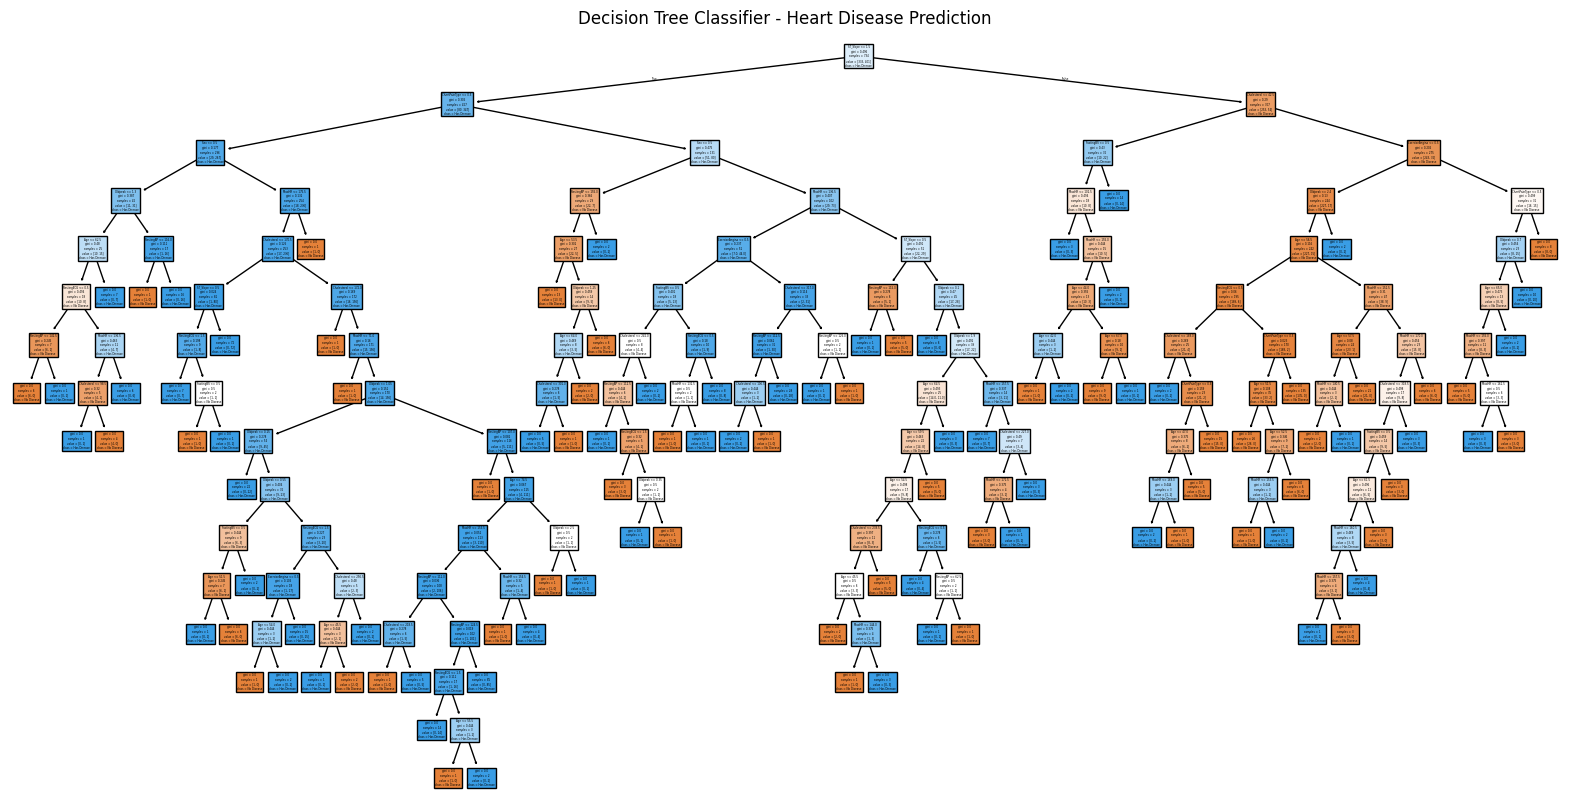

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Choose target and features
target_col = 'HeartDisease'
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categorical variables
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No Disease', 'Has Disease'], filled=True)
plt.title("Decision Tree Classifier - Heart Disease Prediction")
plt.show()